# Univariate Selection Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
data=pd.read_csv("train.csv",nrows=50000)
data.shape

(50000, 133)

In [4]:
data.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [5]:
numerics=['int16','int32','int64','float16','float32','float64']
numerical_vars=data.select_dtypes(include=numerics).columns
data=data[numerical_vars]
data.shape

(50000, 114)

In [6]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test=train_test_split(data.drop(labels=['target','ID'],axis=1),
                                              data['target'],
                                              test_size=0.3,
                                              random_state=0)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(35000, 112) (35000,)
(15000, 112) (15000,)


Lets calculate the univariate statistical measure using f_classif from sklearn

Univariate feature selection works by selecting the best features based on univariate statistical tests (ANOVA). The methods based on F-test estimate the degree of linear dependency between two random variables. They assume a linear relationship between the feature and the target. These methods also assume that the variables follow a Gaussian distribution.

In [10]:
from sklearn.feature_selection import f_classif,SelectKBest

In [12]:
univariate = f_classif(X_train.fillna(0), y_train)
univariate = pd.Series(univariate[1])
univariate.index = X_train.columns
univariate.sort_values(ascending=False, inplace=True)
univariate

/Users/shailendrapatil/anaconda/lib/python3.6/site-packages/sklearn/utils/__init__.py:54: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


v88      9.544505e-01
v76      8.361761e-01
v17      5.707378e-01
v109     4.970579e-01
v64      2.240965e-01
v39      1.759991e-01
v105     1.654706e-01
v128     1.426407e-01
v101     1.270344e-01
v100     8.032445e-02
v93      7.184774e-02
v54      5.875399e-02
v124     5.437944e-02
v131     4.536376e-02
v4       3.861193e-02
v89      3.640605e-02
v102     3.330907e-02
v2       2.436313e-02
v25      2.349829e-02
v8       1.940562e-02
v18      1.915257e-02
v63      1.489100e-02
v108     1.459756e-02
v46      1.334583e-02
v99      1.252190e-02
v106     9.109236e-03
v82      4.703085e-03
v6       3.492297e-03
v60      1.917593e-03
v87      7.641530e-04
            ...      
v45      7.314959e-10
v15      6.494284e-10
v80      3.752291e-10
v40      3.671357e-10
v73      1.698885e-10
v111     3.856975e-11
v84      3.345071e-11
v48      6.310928e-12
v36      2.415070e-12
v81      1.541810e-12
v33      7.638364e-13
v83      6.397547e-13
v121     4.035820e-13
v130     3.970747e-13
v55      1

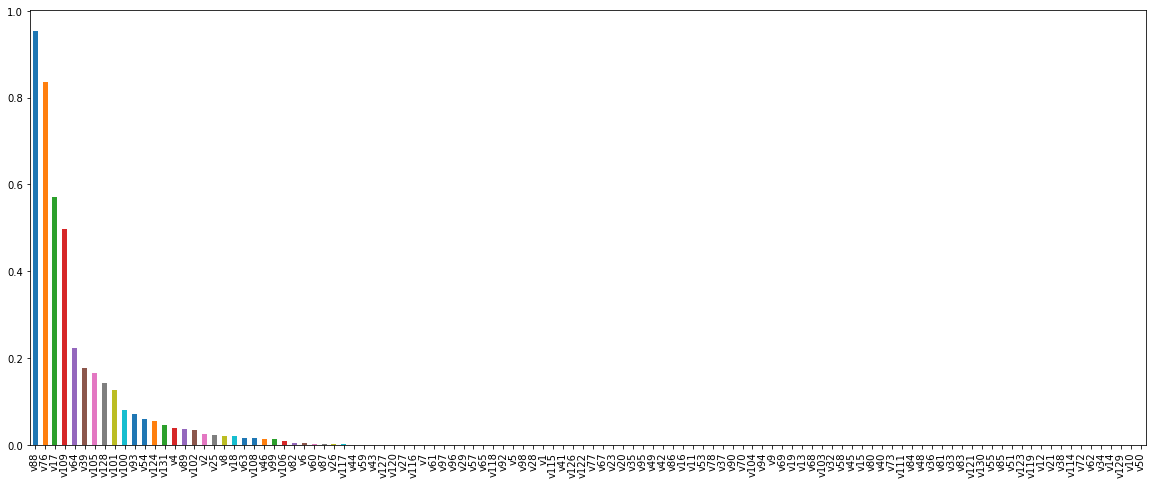

In [13]:
univariate.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [14]:
sel_ = SelectKBest(f_classif, k=10).fit(X_train.fillna(0), y_train)
X_train.columns[sel_.get_support()]

/Users/shailendrapatil/anaconda/lib/python3.6/site-packages/sklearn/utils/__init__.py:54: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


Index(['v10', 'v14', 'v21', 'v34', 'v38', 'v50', 'v62', 'v72', 'v114', 'v129'], dtype='object')

In [15]:
X_train = sel_.transform(X_train.fillna(0))
X_train.shape

/Users/shailendrapatil/anaconda/lib/python3.6/site-packages/sklearn/utils/__init__.py:54: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


(35000, 10)

However, keep in mind that this test assumes a linear relationship, so it might also be the case that the feature is related to the target but not in a linear manner.